<a href="https://colab.research.google.com/github/doukansurel/LLM-Evalution-Metrics/blob/main/LLM_Evalution_Metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1- Bert Score

BertScore, Google'ın geliştirdiği BERT transformers modelini kullanır.
* N-gram modellere göre daha sağlamdır çünkü anlam bakımından aynı kelime sırası bakımından farklı olan metinleri tanıyabilir.
* Hem precision hem de recall puanları sunarak modelin performansına ilişkin kapsamlı bir anlayışa sahip olunmasını sağlar.
* Farklı türdeki metinleri işleyebilir.(tek cümleler,diziler vs.)
* Hesaplaması karışıktır.
* BertScore ölçümünde iyi sonuç vermesi Veri Kümesi, kullanılan model ve göreve göre değişiklik gösterir bundan dolayı göreve göre optimize edilmelidir.
* En yaygın kullanılan metrikler F1 ve Doğruluk skorudur.

Genel olarak:

Text-Summarization:  Result >=0.8 -
Translate: Result >= 0.9-
Text-Generation: Result >= 0.7-
bu değerler genel rehber olduğunu unutmamak gerekir.





**Bert-Score Kullanım Örneği**

In [ ]:
#Kurulum
!pip install transformers
!pip install bert-score

In [4]:
from bert_score import BERTScorer

scorer = BERTScorer(lang="tr")

reference = ["Bu bir test cümlesidir"]
candidate = ["Bu bir test cümlesidir"]

P,R,F1 = scorer.score(candidate,reference)

result = f"Precion: {P.item()}\nRecall: {R.item()} \nF1: {F1.item()}"
print(result)

Precion: 1.0
Recall: 1.0 
F1: 1.0


In [6]:
reference = ["Kedi ve köpek bir memeli hayvandır."]

candidate = ["İt bir memeli hayvandır"]

P,R,F1 = scorer.score(candidate,reference)

result = f"Precion: {P.item()}\nRecall: {R.item()} \nF1: {F1.item()}"
print(result)

Precion: 0.8198739886283875
Recall: 0.7294646501541138 
F1: 0.7720314860343933


In [7]:
from bert_score import score

In [8]:
!git clone https://github.com/Tiiiger/bert_score.git

Cloning into 'bert_score'...
remote: Enumerating objects: 993, done.
remote: Counting objects: 100% (355/355), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 993 (delta 219), reused 321 (delta 197), pack-reused 638
Receiving objects: 100% (993/993), 1.34 MiB | 7.42 MiB/s, done.
Resolving deltas: 100% (534/534), done.


In [9]:
reference_list = ["7.8 büyüklüğünde bir deprem Kahramanmaraş'ı vurdu. Depremde çok sayıda bina yıkıldı ve can kaybı yaşandı. Arama kurtarma çalışmaları devam ediyor.","İstanbul, Türkiye'nin en büyük şehri ve Avrupa'nın en kalabalık şehirlerinden biridir. Tarihi ve kültürel açıdan zengin bir şehir olan İstanbul, birçok medeniyete başkentlik yapmıştır.","Tarım Devrimi, insanlık tarihindeki en önemli dönüm noktalarından biridir. Bu devrim sayesinde insanlar avcı-toplayıcı bir yaşam tarzından yerleşik bir yaşam tarzına geçmiştir.","Yapay zeka, son yıllarda büyük bir gelişme gösteren ve birçok alanda kullanılan bir teknolojidir. Gelecekte yapay zekanın daha da yaygınlaşması ve birçok yeni alanda kullanılması beklenmektedir.","Seyahat etmek, hem bedenimiz hem de ruhumuz için birçok fayda sağlar. Seyahat ederek yeni yerler keşfedebilir, farklı kültürleri tanıyabilir ve kendimizi geliştirebiliriz.","#deprem #kahramanmaraş #geçmişolsun"]

candidate_list = ["Kahramanmaraş'ta 7.8 büyüklüğünde bir deprem meydana geldi. Depremden dolayı çok sayıda bina yıkıldı ve can kayıpları gerçekleşti. Arama kurtarma çalışmaları aralıksız devam ediyor.","Türkiye Cumhuriyeti'nin en popüler şehri olan İstanbul, Avrupa'nın en kalabalık şehirleri arasında yer alır. Tarihi ve kültürel mirasıyla öne çıkan İstanbul, geçmişte birçok medeniyete başkentlik yapmıştır.","Tarım Devrimi, insanlığın evriminde önemli bir rol oynamıştır. Bu devrim sayesinde insanlar avcı-toplayıcı bir yaşam tarzından yerleşik bir yaşam tarzına geçiş yapmıştır. Gelecekte ise tarımın daha da gelişmesi ve yeni teknolojilerle entegre olması beklenmektedir.","Yapay zeka, son yıllarda hızlı bir ilerleme kaydeden ve birçok farklı sektörde kullanılan bir teknolojidir. Gelecekte yapay zekanın daha da entegre olması ve hayatımızın her alanında yer alması öngörülmektedir.","Seyahat etmek, insanoğlunun en keyifli ve öğretici deneyimlerinden biridir. Yeni topraklar keşfetmek, farklı kültürlerle tanışmak ve kendimizi geliştirmek için seyahat etmek oldukça faydalıdır.","Kahramanmaraş'ta meydana gelen depremden dolayı çok üzgünüm. Hayatını kaybedenlere Allah'tan rahmet, yaralılara acil şifalar diliyorum. #deprem #kahramanmaraş #geçmişolsun"]

P, R, F1 = score(candidate_list, reference_list, lang="tr", verbose=True)

calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.66 seconds, 2.26 sentences/sec


In [12]:
result = f"Precion: {P}\nRecall: {R} \nF1: {F1}"
print(result)

Precion: tensor([0.8974, 0.8538, 0.7215, 0.8722, 0.7187, 0.5171])
Recall: tensor([0.9235, 0.8727, 0.8804, 0.9045, 0.7091, 0.8750]) 
F1: tensor([0.9103, 0.8631, 0.7931, 0.8881, 0.7139, 0.6500])


In [37]:
import numpy as np
precion = np.array(P)
recall = np.array(R)
f1 = np.array(F1)

metrics = ["Precion", "Recall", "F1 Score"]

In [38]:
import matplotlib.pyplot as plt
def show(metric):
    fig, axes = plt.subplots(1, 1, figsize=(5,5))
    plt.plot(precion, label=metric)
    plt.title(metric)
    plt.xlabel("Örnek")
    plt.ylabel("Değer")
    plt.legend()
    plt.show()

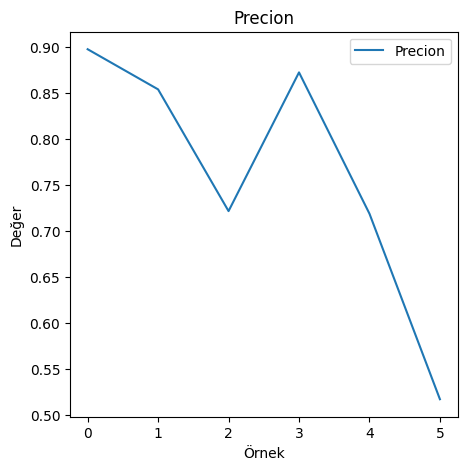

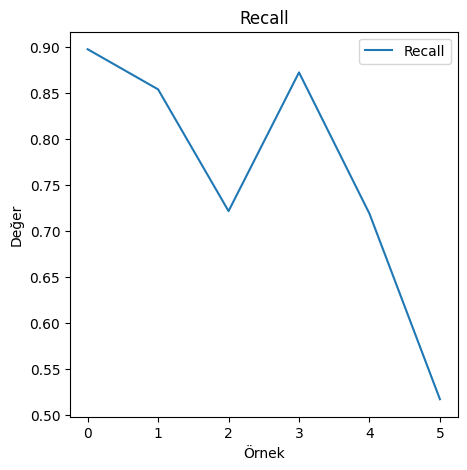

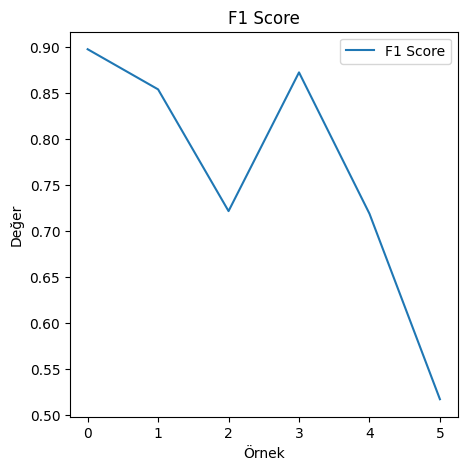

In [39]:
for metric in metrics:
    show(metric)

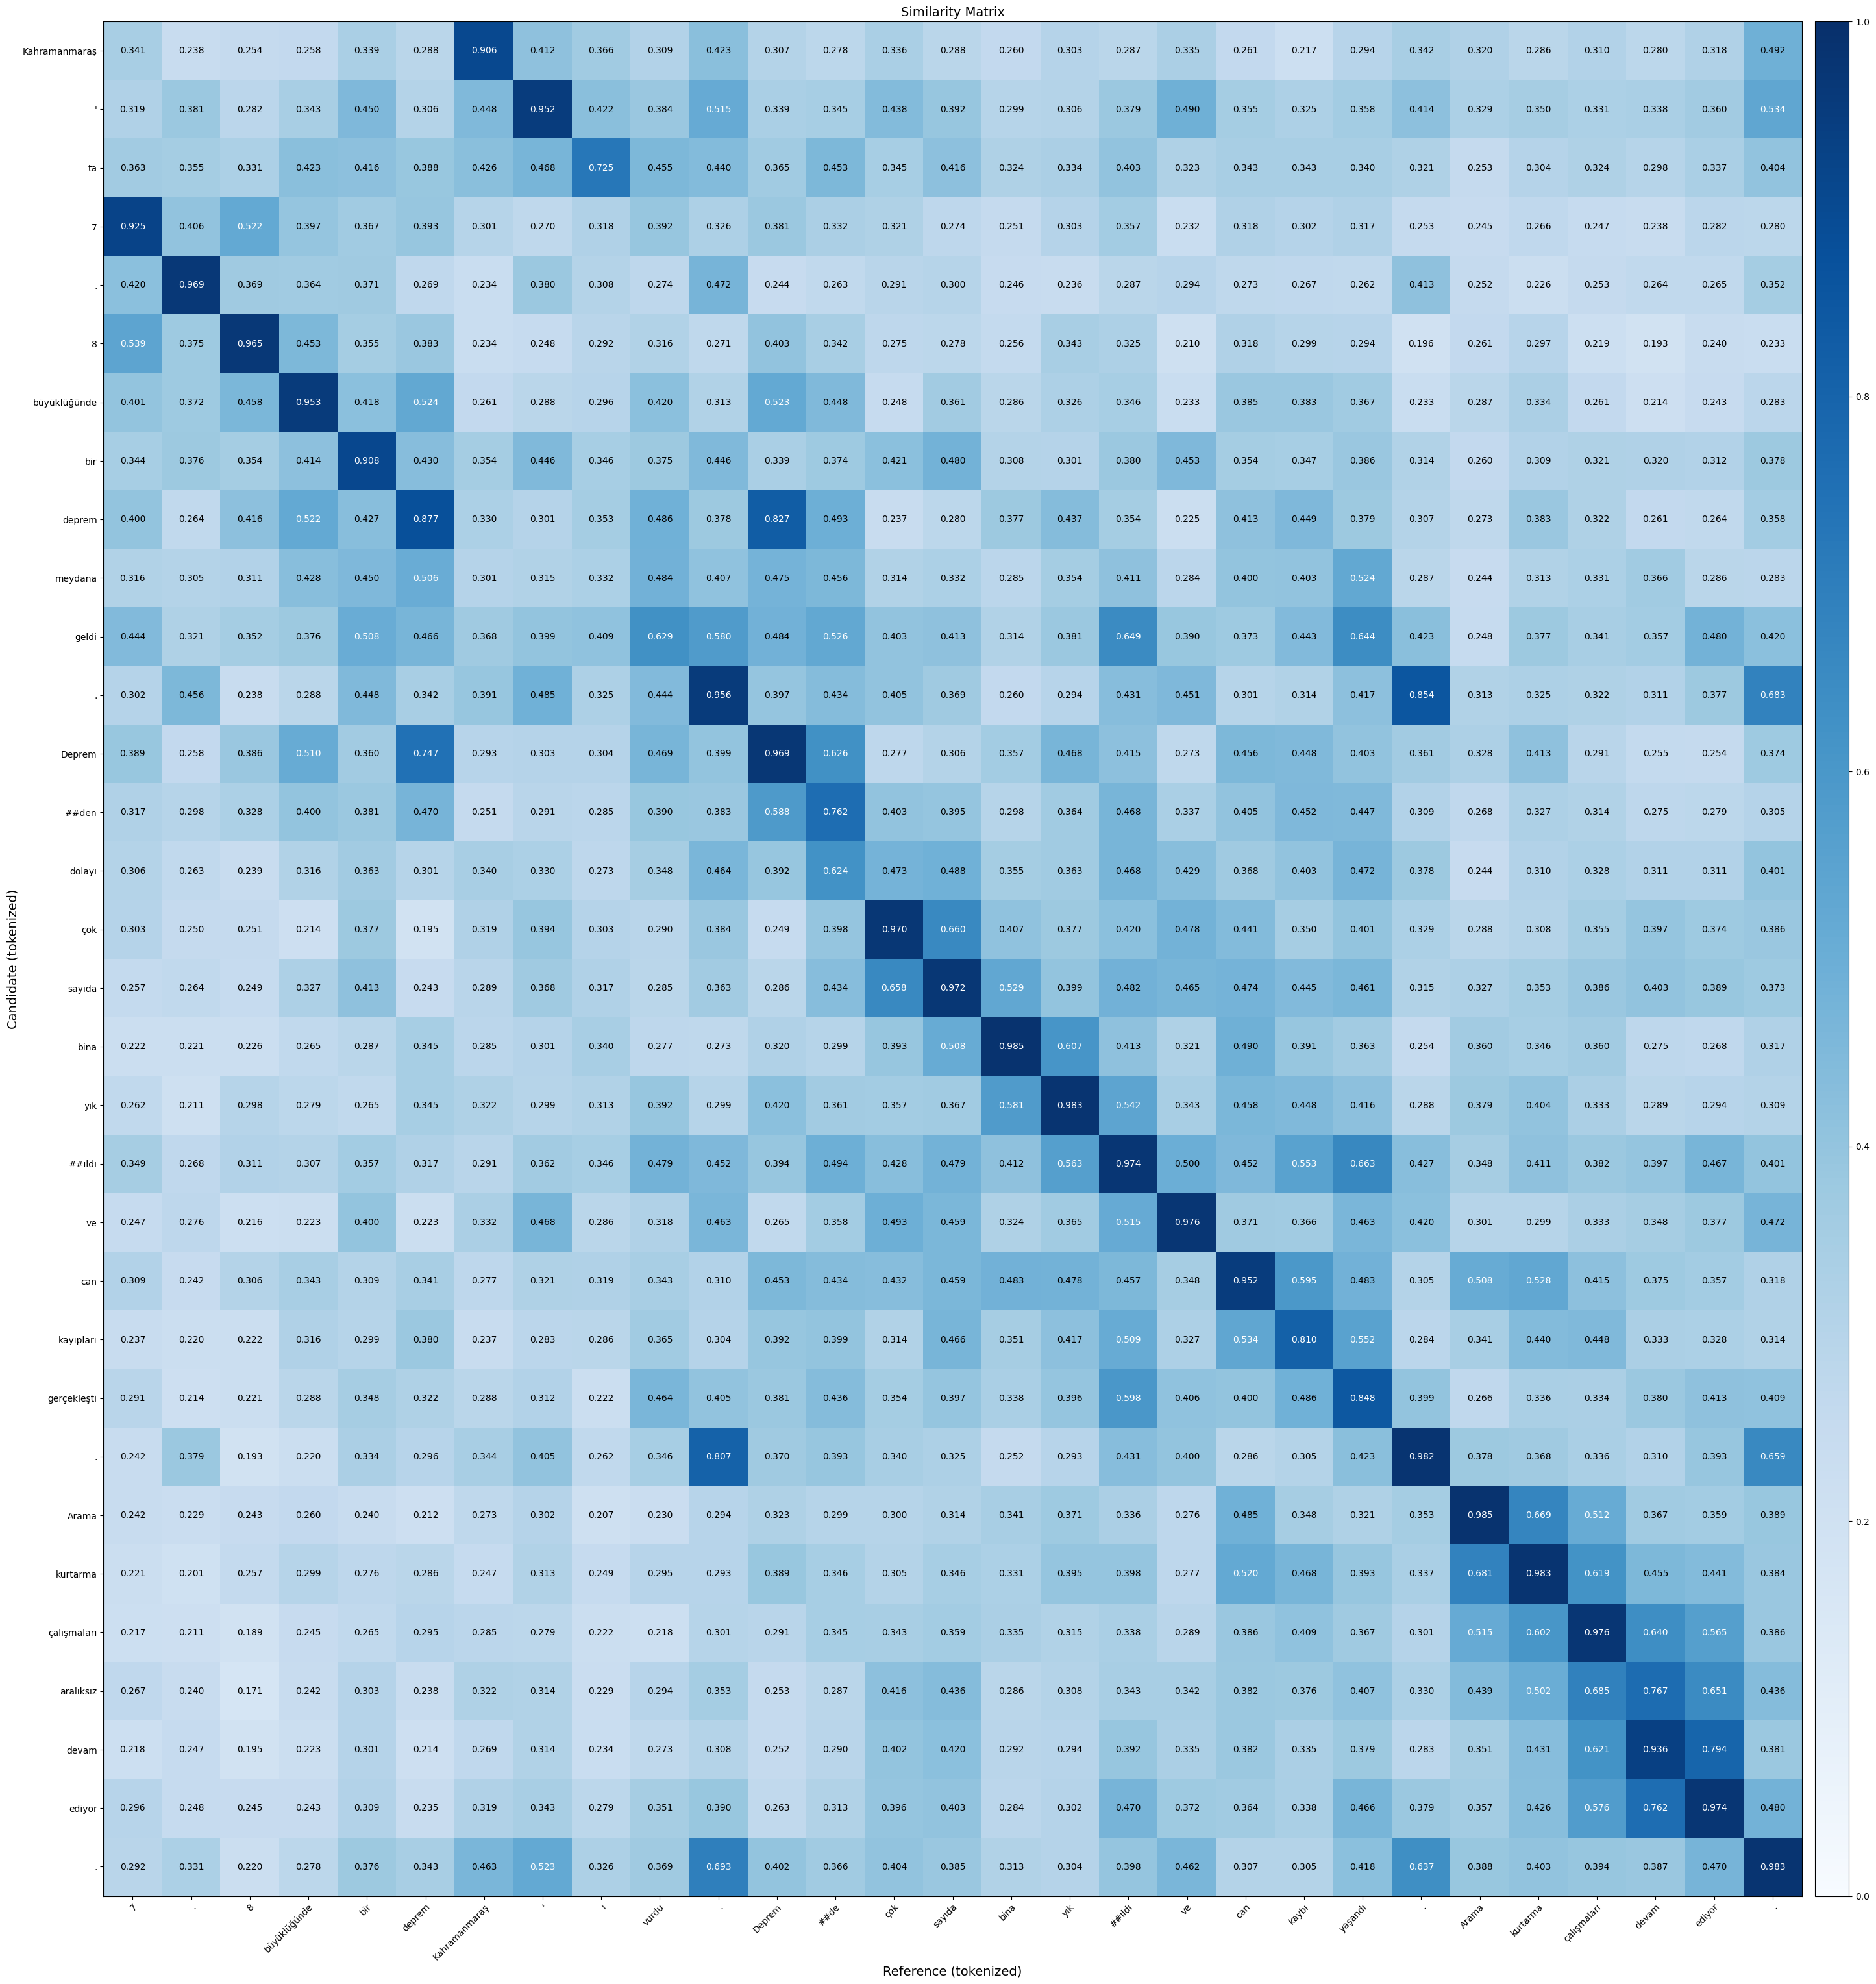

In [40]:
from bert_score import plot_example

cand = candidate_list[0]
ref = reference_list[0]
plot_example(cand, ref, lang="tr")

## 2- ROUGE


Otomatik özetlemeyi değerlendirmek için özel olarak tasarlanmış bir izi  ölçüm ve yazılım paketidir, ancak machine çevirisi içinde kullanılabilir.
* **ROUGE-N:** Model tarafından oluşturulan metin ile insan tarafından üretilen referans arasındaki eşleşen n-gram sayısını ölçer.
* **ROUGE-1:** n-gramların precision, recall ve f1 skorunu ölçer.  
(f1 = 2*(precisionxrecall)/(precision+recall)
* **ROUGE-2:** Referans metinde görünen, aday metindeki 2-gramlık kelimelerin Aday metindeki gram ile oranı  
* **ROUGE-L:** Model çıktısı ile referans çıktı arasındaki en uzun ortak alt diziye *LCS* denir. Rouge-L iki metin arasında paylaşılan en uzun sözcük dizisine göre işlem yapar.
* **ROUGE-SUM:** Farklı n-gram seviyelerini (ROUGE-1, ROUGE-2 gibi) ve LCS'yi birleştirir.


In [44]:
!pip install -q evaluate
!pip install -q rouge_score

  Preparing metadata (setup.py) ... done


In [47]:
import evaluate
rouge = evaluate.load("rouge")
candidates = ["Oradaki insanlara merhaba"]
references = ["Oradaki insanlara merhaba"]

#results = rouge.compute(predictions = candidates, references = references)
results = rouge.compute(predictions=candidates,
                          references=references,
                            tokenizer=lambda x: x.split())
print(results)

{'rouge1': 1.0, 'rouge2': 1.0, 'rougeL': 1.0, 'rougeLsum': 1.0}


In [52]:
def show_rouge_result(references,candidates):
    rouge = evaluate.load("rouge")
#results = rouge.compute(predictions = candidates, references = references)
    results = rouge.compute(predictions=candidates,
                          references=references,
                            tokenizer=lambda x: x.split(),
                            use_aggregator = False
                            )
    return results

In [53]:
candidates = ["Türkiye'nin başkenti Ankara'dır.","Ankara, Anadolu'nun ortasında yer alan bir şehirdir.","Ankara'nın nüfusu yaklaşık 5 milyon kişidir.","Ankara'da birçok tarihi ve turistik yer bulunmaktadır."]
references =["Türkiye Cumhuriyeti'nin başkenti Ankara'dır.","Ankara, İç Anadolu Bölgesi'nde yer alan bir şehirdir.","Ankara'nın nüfusu 5 milyondan fazladır.","Ankara'da Anıtkabir, Anadolu Medeniyetleri Müzesi ve Hamamönü gibi birçok tarihi ve turistik yer bulunmaktadır."]

In [54]:
rouge_result = show_rouge_result(references,candidates)


In [57]:
print(rouge_result.keys())
print(rouge_result["rouge1"])

dict_keys(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'])
[0.5714285714285715, 0.6666666666666666, 0.5454545454545454, 0.6666666666666666]


In [71]:
import numpy as np
import pandas as pd

In [72]:
rouge_scores = {
    "rouge1": rouge_result["rouge1"],
    "rouge2": rouge_result["rouge2"],
    "rougeL": rouge_result["rougeL"],
    "rougeLsum": rouge_result["rougeLsum"]
}

df = pd.DataFrame(rouge_scores)

df["aday_metin"] = candidates
df["referans_metin"] = references

df = df[["aday_metin", "referans_metin", "rouge1", "rouge2", "rougeL", "rougeLsum"]]

display(df)

,aday_metin,referans_metin,rouge1,rouge2,rougeL,rougeLsum
0,Türkiye'nin başkenti Ankara'dır.,Türkiye Cumhuriyeti'nin başkenti Ankara'dır.,0.571429,0.400000,0.571429,0.571429
1,"Ankara, Anadolu'nun ortasında yer alan bir şeh...","Ankara, İç Anadolu Bölgesi'nde yer alan bir şe...",0.666667,0.461538,0.666667,0.666667
2,Ankara'nın nüfusu yaklaşık 5 milyon kişidir.,Ankara'nın nüfusu 5 milyondan fazladır.,0.545455,0.222222,0.545455,0.545455
3,Ankara'da birçok tarihi ve turistik yer bulunm...,"Ankara'da Anıtkabir, Anadolu Medeniyetleri Müz...",0.666667,0.526316,0.666667,0.666667


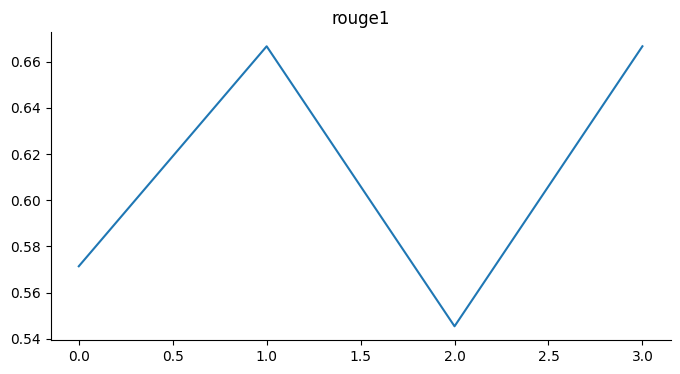

In [84]:
df['rouge1'].plot(kind='line', figsize=(8, 4), title='rouge1')
plt.gca().spines[['top', 'right']].set_visible(False)

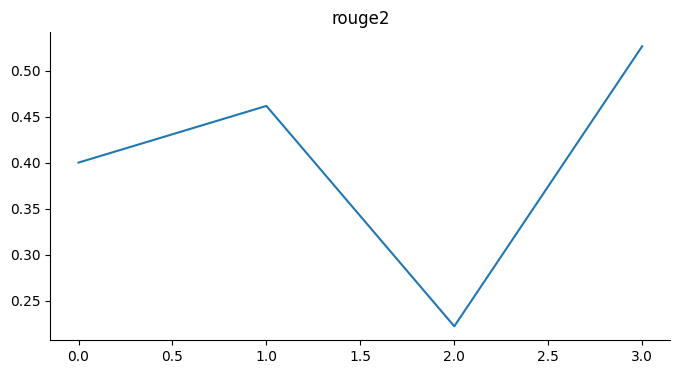

In [75]:
df['rouge2'].plot(kind='line', figsize=(8, 4), title='rouge2')
plt.gca().spines[['top', 'right']].set_visible(False)

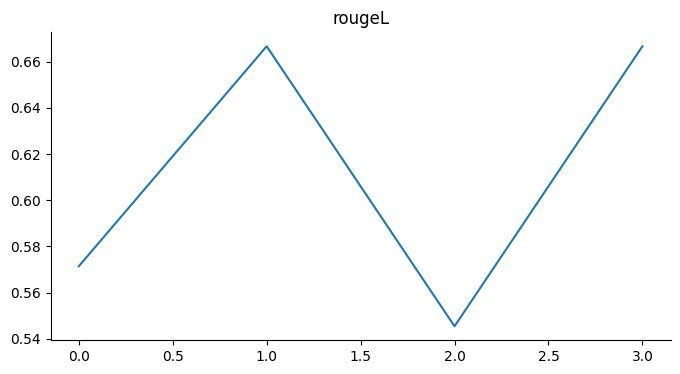

In [76]:
df['rougeL'].plot(kind='line', figsize=(8, 4), title='rougeL')
plt.gca().spines[['top', 'right']].set_visible(False)

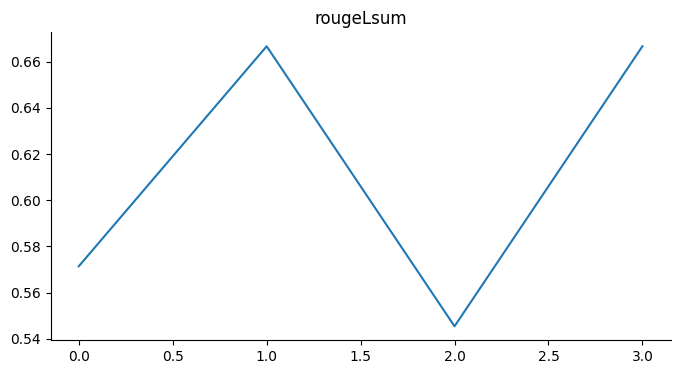

In [80]:
df['rougeLsum'].plot(kind='line', figsize=(8, 4), title='rougeLsum')
plt.gca().spines[['top', 'right']].set_visible(False)

##-

##3- EXACT_MATCH

Girilen tahmini dizelerin referanslarıyla tam olarak eşleşme oranını döndürür. Verilen bir tahmin dizesinin tam eşleşme puanı, referans dizesiyle tam olarak aynıysa 1, aksi takdirde 0'dır.

In [85]:
from evaluate import load

exact_match_metric = load("exact_match")

In [98]:
predict = "Merhaba"
reference = "Merhaba"

results = exact_match_metric.compute(predictions=predict, references=reference)

In [99]:
results

{'exact_match': 1.0}

In [ ]:
# reference = ["Türkiye, Ukrayna'ya insani yardım göndermeye devam ediyor.","Bu telefon, 6.7 inç AMOLED ekrana, 48 megapiksel kameraya ve 5000 mAh pil kapasitesine sahiptir.","Bu fonksiyon, parametre olarak girilen değeri kontrol eder ve geçerliyse işleme devam eder.","Sözleşmenin bu maddesi, tarafların hak ve yükümlülüklerini belirler.","Karakter, karanlık odada bir anahtar arıyor."] = "Merhabas"
# predict = ["Türkiye, Ukrayna'ya insani yardımlarını sürdürüyor.","Telefon, 6.7 inç AMOLED ekran, 48 MP kamera ve 5000 mAh pil ile donatılmıştır.","Fonksiyon, parametre değerini kontrol ederek geçerliyse işleme devam eder.","Madde, tarafların hak ve yükümlülüklerini düzenler.","Karakter, karanlık odada anahtarı arıyor."]

# results = exact_match_metric.compute(predictions=predict, references=reference)

In [102]:
reference = ["Türkiye Cumhuriyeti, 1923 yılında Mustafa Kemal Atatürk tarafından kurulmuştur. Başkenti Ankara'dır. Nüfusu 84 milyon civarındadır. Resmi dili Türkçedir. Para birimi Türk Lirası'dır.","Dün akşam İstanbul'da bir trafik kazası meydana geldi. Kazada 3 kişi yaralandı. Yaralılar hastaneye kaldırıldı. Kazanın sebebi araştırılıyor.","Telefon, 6.7 inç AMOLED ekran, 48 MP kamera ve 5000 mAh pil ile donatılmıştır. 4 GB RAM ve 128 GB depolama alanı sunar."]
predict = ["Türkiye Cumhuriyeti, 1923'te Mustafa Kemal Atatürk tarafından kurulmuştur. Başkenti Ankara'dır. Nüfusu 84 milyon civarındadır. Resmi dili Türkçedir. Para birimi Türk Lirası'dır.","Dün akşam İstanbul'da bir trafik kazası gerçekleşti. Kazada 3 kişi yaralandı ve hastaneye kaldırıldı. Kazanın sebebi araştırılıyor.","Telefon, 6.7 inç AMOLED ekran, 48 MP kamera ve 5000 mAh pil ile donatılmıştır. 4 GB RAM ve 128 GB depolama alanı sunar."]
results = exact_match_metric.compute(predictions=predict, references=reference)

In [103]:
results

{'exact_match': 0.3333333333333333}

##4-PERPLEXİTY

Karmaşıklığın bir ölçütü olarak düşünülebilir.  
Bir dizi cümlenin sözcüklerini rastgele seçen basit bir programdan ziyade, insanlar  tarafından yazılmış görünüp, görünmediğini bize söylemek için kullanılır.  
**Perplexity küçük ise => İnsan tarafından yazılmış gibi yorumlanır**  


*   İyi dil modellerinin perplexity puanı: 20-60 arasındadır.

